In [ ]:
pip install yfinance

In [2]:
from cvxpy_portfolio_optimizer._enums import RebalanceFrequency
from cvxpy_portfolio_optimizer.backtester import Backtester
from cvxpy_portfolio_optimizer.constraint_function import (
    NoShortSellConstraint,
    SumToOneConstraint,
)
from cvxpy_portfolio_optimizer.objective_function import VarianceObjectiveFunction
import yfinance as yf

In [3]:
tickers = ["TSLA", "MSFT", "IBM", "GOOG", "AAPL", "AMZN", "ADBE"]
rets = (
    yf.download(tickers, period="2y")["Adj Close"].loc[:, tickers].pct_change().iloc[1:, :].ffill()
)
rets

[*********************100%%**********************]  7 of 7 completed


Ticker,TSLA,MSFT,IBM,GOOG,AAPL,AMZN,ADBE
Date,,,,,,,
2022-05-26,0.074271,0.012875,0.018602,0.023210,0.023200,0.040295,0.015155
2022-05-27,0.073333,0.027604,0.017386,0.041581,0.040757,0.036632,0.048018
2022-05-31,-0.001804,-0.005014,-0.003087,0.010993,-0.005346,0.043970,-0.027416
2022-06-01,-0.023593,0.002023,0.004250,0.000859,-0.000873,0.012266,0.004034
2022-06-02,0.046774,0.007929,0.005164,0.031620,0.016811,0.031450,0.055290
...,...,...,...,...,...,...,...
2024-05-20,-0.014144,0.012208,0.005265,0.006599,0.006162,-0.006280,0.002606
2024-05-21,0.066591,0.008699,0.020892,0.006052,0.006857,-0.002125,-0.005859
2024-05-22,-0.034780,0.003450,0.001268,-0.008577,-0.007538,-0.000109,0.004317


Create a backtester object and run backtest

In [4]:
bt = Backtester(
    learning_days=365,
    rebalance_frequency=RebalanceFrequency.ONE_MONTH,
    returns=rets,
    objective_functions=[VarianceObjectiveFunction()],
    constraint_functions=[SumToOneConstraint(), NoShortSellConstraint()],
)
bt_out = bt.run()

In [5]:
bt_out.portfolio_returns

Date
2023-06-01    0.010153
2023-06-02    0.019196
2023-06-05    0.002466
2023-06-06    0.000606
2023-06-07    0.007930
                ...   
2024-05-17    0.000572
2024-05-20    0.006491
2024-05-21    0.012641
2024-05-22   -0.002076
2024-05-23   -0.016943
Length: 247, dtype: float64

<Axes: xlabel='Date'>

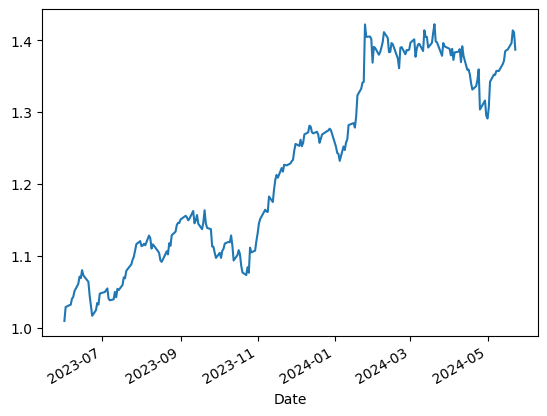

In [6]:
(1 + bt_out.portfolio_returns).cumprod().plot()

It's also possible to access all the rebalanced portfolios

In [7]:
bt_out.portfolios

{Timestamp('2023-06-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469013f0>,
 Timestamp('2023-07-03 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1468d73d0>,
 Timestamp('2023-08-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469f8970>,
 Timestamp('2023-09-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469f8b50>,
 Timestamp('2023-10-02 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469f9ed0>,
 Timestamp('2023-11-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469fa860>,
 Timestamp('2023-12-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469fb1f0>,
 Timestamp('2024-01-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x1469fb730>,
 Timestamp('2024-02-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x146ad4580>,
 Timestamp('2024-03-01 00:00:00'): <cvxpy_portfolio_optimizer.portfolio.Portfolio at 0x146ad4ee0>,
 Timestamp